In [1]:
import pandas as pd

import sys
import os 
from InterestRateCurve.InterestRateCurveData import InterestRateCurveData

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
tickers

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                       Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [3]:
tickers['GICS Sector'].value_counts()

GICS Sector
Industrials               76
Financials                72
Health Care               65
Information Technology    64
Consumer Discretionary    52
Consumer Staples          38
Real Estate               31
Utilities                 30
Materials                 29
Communication Services    23
Energy                    23
Name: count, dtype: int64

In [30]:
CONF_PATH = "/Users/jamesguan/Project/intuitionProject/config.json"
IRCD = InterestRateCurveData(CONF_PATH = CONF_PATH)
IRCD.date_input('2000-01-01', '2023-10-07')
t_data = IRCD.bond_data()

In [31]:
industry_df_daily = pd.read_csv('./datasets/Industry/10_Industry_Portfolios_Daily.csv').dropna()
industry_df_daily['Date'] = pd.to_datetime(industry_df_daily['Date'],format="%Y%m%d")
industry_df_daily.index = industry_df_daily['Date'].values
industry_df_daily = industry_df_daily.drop(['Date'], axis = 1)

In [32]:
t_data['LMS'] = t_data['DGS30'] - t_data['DGS3MO']

In [33]:
# import data and merge data
data = pd.merge(industry_df_daily, t_data, left_index=True, right_index=True, how='inner')

In [35]:
N = 30
data_normalized = (data - data.rolling(N).mean())/data.rolling(N).std()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

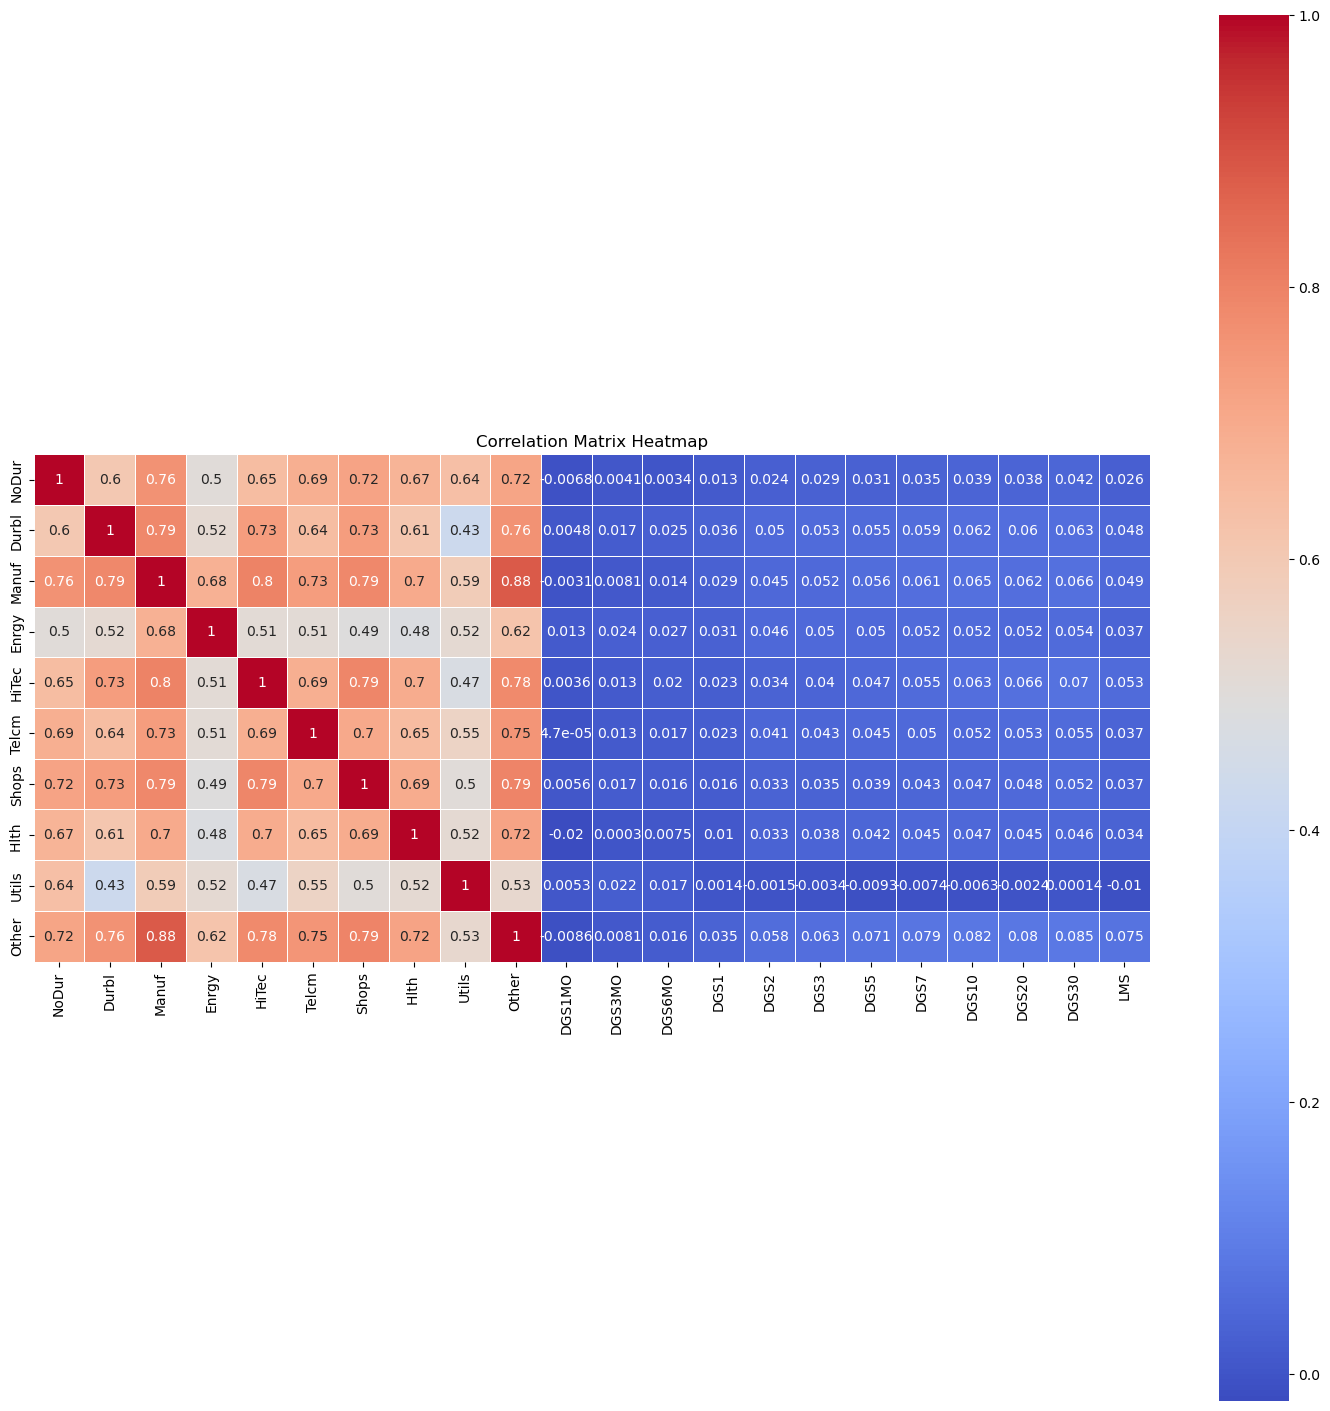

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
sns.heatmap(data_normalized.corr()[0:10], annot=True, cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")

 1 NoDur  Consumer Nondurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys
          0100-0999
          2000-2399
          2700-2749
          2770-2799
          3100-3199
          3940-3989

 2 Durbl  Consumer Durables -- Cars, TVs, Furniture, Household Appliances
          2500-2519
          2590-2599
          3630-3659
          3710-3711
          3714-3714
          3716-3716
          3750-3751
          3792-3792
          3900-3939
          3990-3999

 3 Manuf  Manufacturing -- Machinery, Trucks, Planes, Chemicals, Off Furn, Paper, Com Printing
          2520-2589
          2600-2699
          2750-2769
          2800-2829
          2840-2899
          3000-3099
          3200-3569
          3580-3621
          3623-3629
          3700-3709
          3712-3713
          3715-3715
          3717-3749
          3752-3791
          3793-3799
          3860-3899

 4 Enrgy  Oil, Gas, and Coal Extraction and Products
          1200-1399
          2900-2999

 5 HiTec  Business Equipment -- Computers, Software, and Electronic Equipment
          3570-3579
          3622-3622 Industrial controls
          3660-3692
          3694-3699
          3810-3839
          7370-7372 Services - computer programming and data processing
          7373-7373 Computer integrated systems design
          7374-7374 Services - computer processing, data preparation and processing  
          7375-7375 Services - information retrieval services
          7376-7376 Services - computer facilities management service
          7377-7377 Services - computer rental and leasing
          7378-7378 Services - computer maintenance and repair
          7379-7379 Services - computer related services
          7391-7391 Services - R&D labs
          8730-8734 Services - research, development, testing labs

 6 Telcm  Telephone and Television Transmission
          4800-4899

 7 Shops  Wholesale, Retail, and Some Services (Laundries, Repair Shops)
          5000-5999
          7200-7299
          7600-7699

 8 Hlth   Healthcare, Medical Equipment, and Drugs
          2830-2839
          3693-3693
          3840-3859
          8000-8099

 9 Utils  Utilities
          4900-4949

10 Other  Other -- Mines, Constr, BldMt, Trans, Hotels, Bus Serv, Entertainment, Finance


In [70]:
vals = data_normalized.corr()['LMS'][[i not in IRCD._TREASURY_TICKER_LIST+['LMS'] for i in data_normalized.corr()['LMS'].index]]

In [83]:
vals.sort_values()

Utils   -0.010141
NoDur    0.025987
Hlth     0.033592
Enrgy    0.036828
Telcm    0.037370
Shops    0.037437
Durbl    0.047809
Manuf    0.048725
HiTec    0.052598
Other    0.075075
Name: LMS, dtype: float64

### Ideas

Maybe we can construct a portfolio that is based on the interest rate. And long and short the equities based on the SPY. 

## 1. Let us constrct the porfolio that is based on the SPY500 sectors and calcualte the daily return. 

constrcut a mongoDB that store the SPY500 data.

## 2. Do the same thing on the sectors. 